<a href="https://colab.research.google.com/github/MaGicInU/First-ML-Model/blob/main/first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Load data set**
df -> data frame

In [ ]:
!git init


Reinitialized existing Git repository in /content/.git/


In [ ]:
!git config --global user.email "prathii003@gmail.com"
!git config --global user.name "MaGicInU"

In [ ]:
!git add -A

In [ ]:
!git commit -m “first commit”

error: pathspec 'commit”' did not match any file(s) known to git


In [ ]:
!git branch -M main

error: refname refs/heads/master not found
fatal: Branch rename failed


In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


##**Data Preparation**



###Data Separation as X and Y

In [ ]:
Y = df['logS']
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [ ]:
X= df.drop('logS', axis=1) #axis=0--->row mode, axis=1--->col
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test=train_test_split(X ,Y ,test_size=0.2 ,random_state=100)


In [ ]:
X_train # 80% of data

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [ ]:
X_test # 20% of data

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


## **Model Building**

### **Linear Regression**

**Traing the model to make prediction**

In [ ]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

**Applying the model to make prediction**

In [ ]:
Y_lr_train_pred = lr.predict(X_train)
Y_lr_test_pred =lr.predict(X_test)

In [ ]:
print(Y_lr_test_pred)

In [ ]:
Y_lr_train_pred

**Evalute model performance**

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

lr_train_mse = mean_squared_error(Y_train,Y_lr_train_pred)
lr_train_r2 = r2_score(Y_train,Y_lr_train_pred)

lr_test_mse = mean_squared_error(Y_test,Y_lr_test_pred)
lr_test_r2 = r2_score(Y_test,Y_lr_test_pred)

In [ ]:
lr_results=pd.DataFrame(['Linear Regress',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results

,0,1,2,3,4
0,Linear Regress,1.007536,0.764505,1.020695,0.789162


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2 ,random_state=100)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=2, random_state=100)

**Applying the model to make prediction**

In [ ]:
Y_rf_train_pred = rf.predict(X_train)
Y_rf_test_pred =rf.predict(X_test)

**Evalute model performance**

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

rf_train_mse = mean_squared_error(Y_train,Y_rf_train_pred)
rf_train_r2 = r2_score(Y_train,Y_rf_train_pred)

rf_test_mse = mean_squared_error(Y_test,Y_rf_test_pred)
rf_test_r2 = r2_score(Y_test,Y_rf_test_pred)

In [ ]:
rf_results=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results

,0,1,2,3,4
0,Random Forest,1.028228,0.759669,1.407688,0.709223


##**Model Comparison**

In [ ]:
df_models =pd.concat([lr_results,rf_results])
df_models

,0,1,2,3,4
0,Linear Regress,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **Data Visualization**

Text(0.5, 0, 'Experimental Logs')

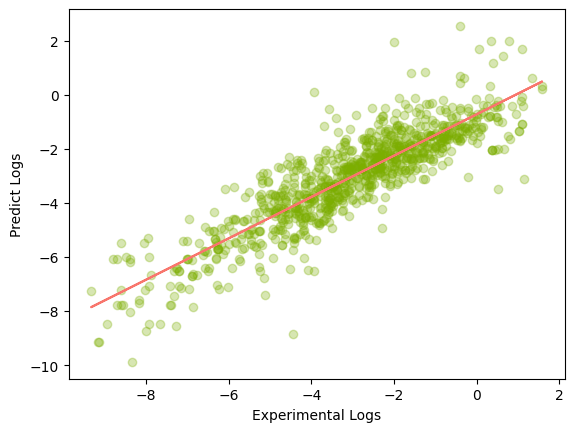

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=Y_train,y=Y_lr_train_pred,c="#7cae00",alpha=0.3)

z=np.polyfit(Y_train,Y_lr_train_pred,1)
p= np.poly1d(z)

plt.plot(Y_train, p(Y_train), '#f8766d')
plt.ylabel('Predict Logs')
plt.xlabel('Experimental Logs')